In [1]:
import pandas as pd
import matplotlib as plt
import json
from datetime import timedelta
from datetime import datetime

In [2]:
f = open('D:/HATHWAY ISP/DSC/Unit17/logins.json',)
data = json.load(f)
f.close()

In [3]:
data_j = []
Aggregate = {}

In [4]:
for t in data['login_time']:
    data_j.append(datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))

In [5]:
data_j.sort()

In [6]:
time_int = timedelta(minutes=15)

In [7]:
c = 0 
check = data_j[0]
for i in range(len(data_j)):
    if data_j[i] <= check + time_int:
        c+=1
    else:
        check = data_j[i]
        c = 0
    Aggregate[datetime.strftime(check, '%Y-%m-%d %H:%M:%S')] = c  

In [8]:
Aggregate_Data = pd.DataFrame.from_dict(Aggregate, orient='index', columns=['Login Count']).sort_index()#sort_values(by='Login Count')

In [9]:
Aggregate_Data.plot(kind='line', figsize=(20,5), rot=30)

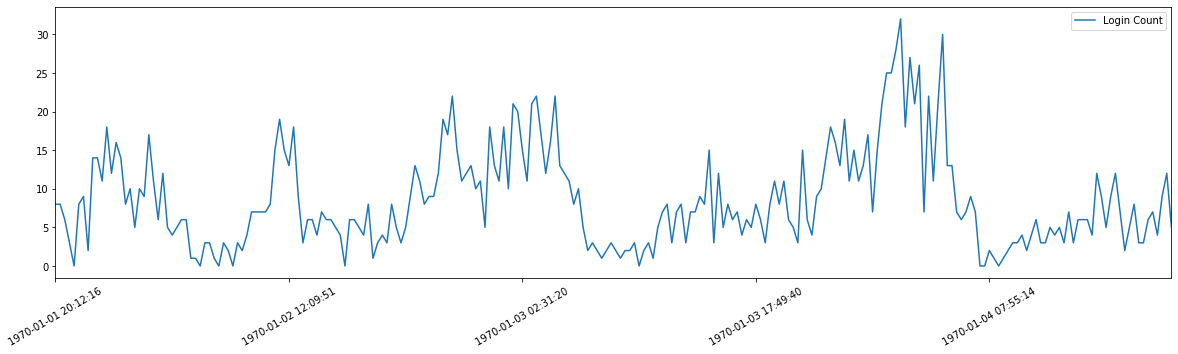

In [10]:
Aggregate_Data[Aggregate_Data.index < '1970-01-04 20:20:20'].plot(kind='line', figsize=(20,5), rot=30)

In [11]:
len(Aggregate_Data)

8218

In [12]:
f = open('D:/HATHWAY ISP/DSC/Unit17/ultimate_data_challenge.json',)
data_u = json.load(f)
f.close()

In [13]:
data_u = pd.DataFrame.from_dict(data_u)#, columns=['Login Count'])

In [14]:
data_u.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [15]:
( 
    data_u
    .filter(["city", "avg_rating_of_driver"])
    .groupby("city")
    #.agg("avg_rating_of_driver")
    #.sort_values(by="avg_rating_of_driver", ascending=False)
    #.sort_values(by = ['city'], ascending = False)
    .head()
)

,city,avg_rating_of_driver
0,King's Landing,4.7
1,Astapor,5.0
2,Astapor,4.3
3,King's Landing,4.6
4,Winterfell,4.4
5,Winterfell,3.5
6,Astapor,NaN
7,Winterfell,5.0
8,Winterfell,4.5
9,Winterfell,NaN


In [16]:
data_u.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [18]:
data_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [ ]:
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

In [31]:
data_u[data_u['city']=='Astapor']#['ultimate_black_user']

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
14,26.01,5.0,NaN,1.00,Astapor,2014-01-28,Android,2014-01-27,0.0,1,False,100.0
21,3.31,5.0,NaN,1.00,Astapor,2014-04-29,iPhone,2014-01-09,0.0,1,False,100.0
24,2.10,4.7,4.5,1.02,Astapor,2014-05-18,iPhone,2014-01-19,9.1,4,False,36.4
26,1.66,5.0,4.0,1.00,Astapor,2014-01-22,Android,2014-01-16,0.0,1,False,100.0
29,11.25,5.0,4.0,1.00,Astapor,2014-02-27,Android,2014-01-27,0.0,1,False,100.0
30,6.12,4.8,5.0,1.00,Astapor,2014-02-07,iPhone,2014-01-26,0.0,4,True,25.0
34,4.12,5.0,NaN,1.25,Astapor,2014-01-17,Android,2014-01-16,100.0,1,False,100.0


In [ ]:
( 
    data_u
    .filter(["city", "avg_rating_of_driver"])
    .groupby("city")
    #.agg("avg_rating_of_driver")
    #.sort_values(by="avg_rating_of_driver", ascending=False)
    #.sort_values(by = ['city'], ascending = False)
    .head()
)